# Desafio 02 - IGTI - Wine Quality
- Autor: Rodrigo de Lima Oliveira
- LinkedIn: https://www.linkedin.com/in/rodrigolima82/

## Carregando as bibliotecas

In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Desafio 02 - Rodrigo" --iversions

platform   1.0.8
matplotlib 3.2.1
numpy      1.18.2
seaborn    0.10.0
pandas     0.25.3
plotly     4.6.0
py4j       0.10.7
Desafio 02 - Rodrigo


## Carregar de arquivo CSV

In [4]:
train = pd.read_csv('winequality-red.csv', sep=';')

# Visualizando o shape do dataset (1.599 linhas x 12 colunas)
print(train.shape)

# Verificando os tipos de dados
train.info()

# Visualizando as primeiras linhas do dataset
train.head()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Analise Exploratória dos Dados

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
# Funcao para verificar valores missing no dataset
def check_missing(df, display = 10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Ótimo! Não há mais valores faltantes neste dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)

# Verificando as colunas com dados missing do dataset
check_missing(train, display = 20)

Ótimo! Não há mais valores faltantes neste dataset.


## Analisando a feature a ser prevista: quality

In [7]:
# Contando os tipos de dados da feature quality
train['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

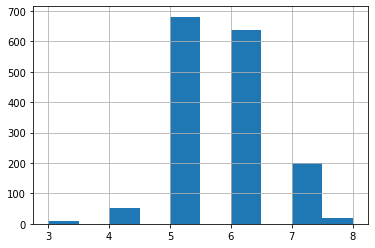

In [8]:
# Verificando o histograma dessa feature
train['quality'].hist();

In [9]:
# Visualizando um df com quantidade e percentual da variavel quality para cada classe
df = pd.DataFrame(train['quality'].value_counts())
df['%'] = 100*df['quality']/train['quality'].shape[0]
df

,quality,%
5,681,42.589118
6,638,39.899937
7,199,12.445278
4,53,3.314572
8,18,1.125704
3,10,0.625391


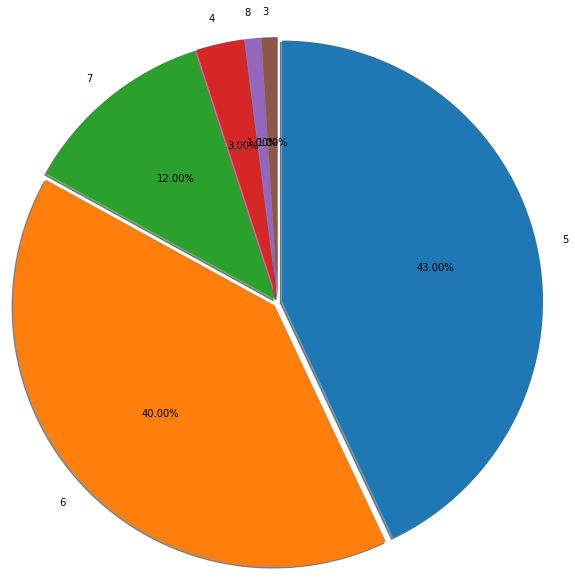

In [10]:
# Vamos visualizar de forma gráfica

# Percentual de cada valor da variável alvo
percentual = round(train.quality.value_counts() / len(train.index) * 100, 0)

# Labels
labels = [5, 6, 7, 4, 8, 3]

# Plot
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 3,
        autopct = '%1.2f%%',
        explode = [0.05,0.05,0.05,0.05,0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show();

## Analisando as relação entre as features "alcohol" e "quality""

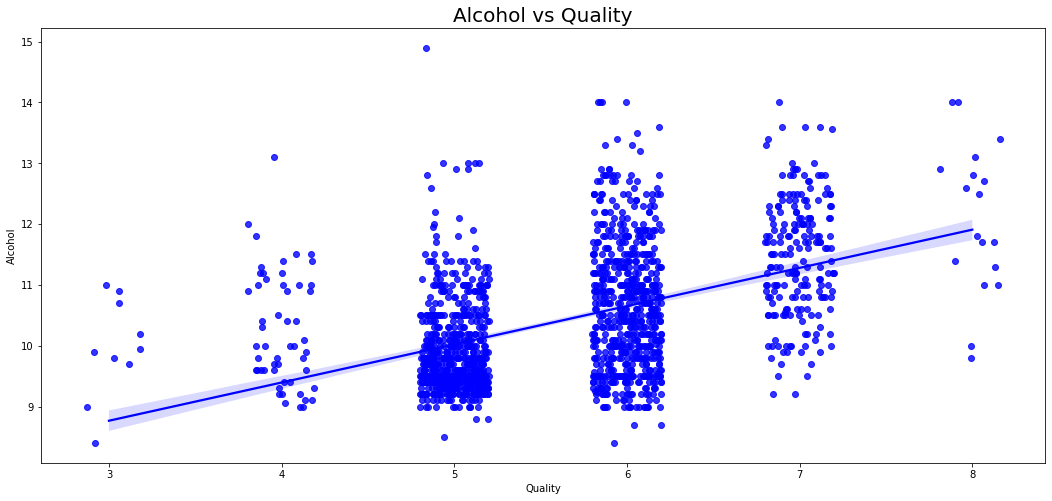

In [11]:
# Visualiza um gráfico entre as variaveis alcohol e quality e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(y='alcohol', x='quality', data=train, color='b', x_jitter=0.2)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Quality', fontsize=20)
plt.show();

## Analisando as relação entre as features "fixed acidity" e "pH"

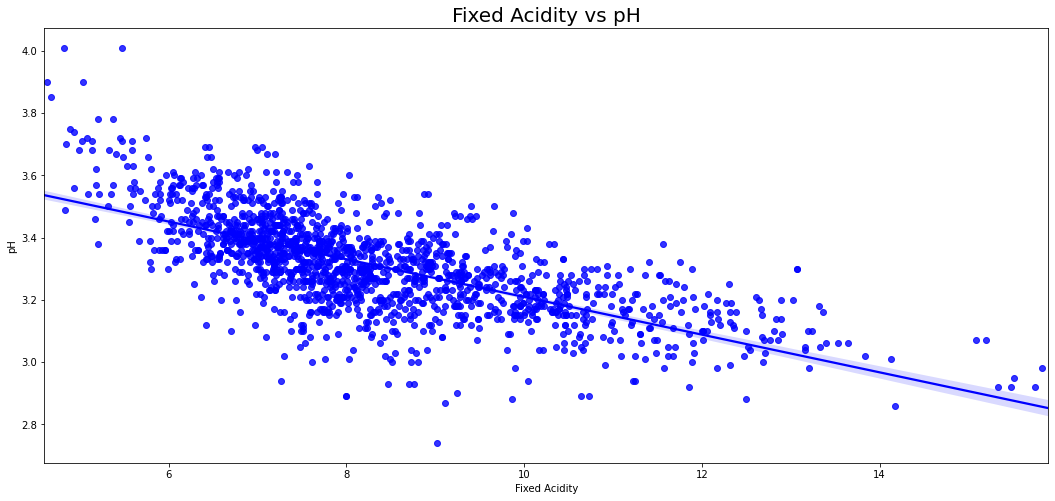

In [12]:
# Visualiza um gráfico entre as variaveis alcohol e quality e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(x='fixed acidity', y='pH', data=train, color='b', x_jitter=0.2)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH', fontsize=20)
plt.show();

## Observações
- É possível observar que a feature TARGET possui 6 classes [3, 4, 5, 6, 7, 8]
- As classes 5 e 6 possuem juntas mais de 80% dos dados
- Pelo gráfico 01 é possível notar uma leve melhora na qualidade do vinho quando tem um maior teor alcoolico
- Pelo gráfico 02 é possível notar que existe uma correlação negativa, ou seja, quanto maior o "fixed acidity, menor é o "pH".

## Visualizando a correlação das features

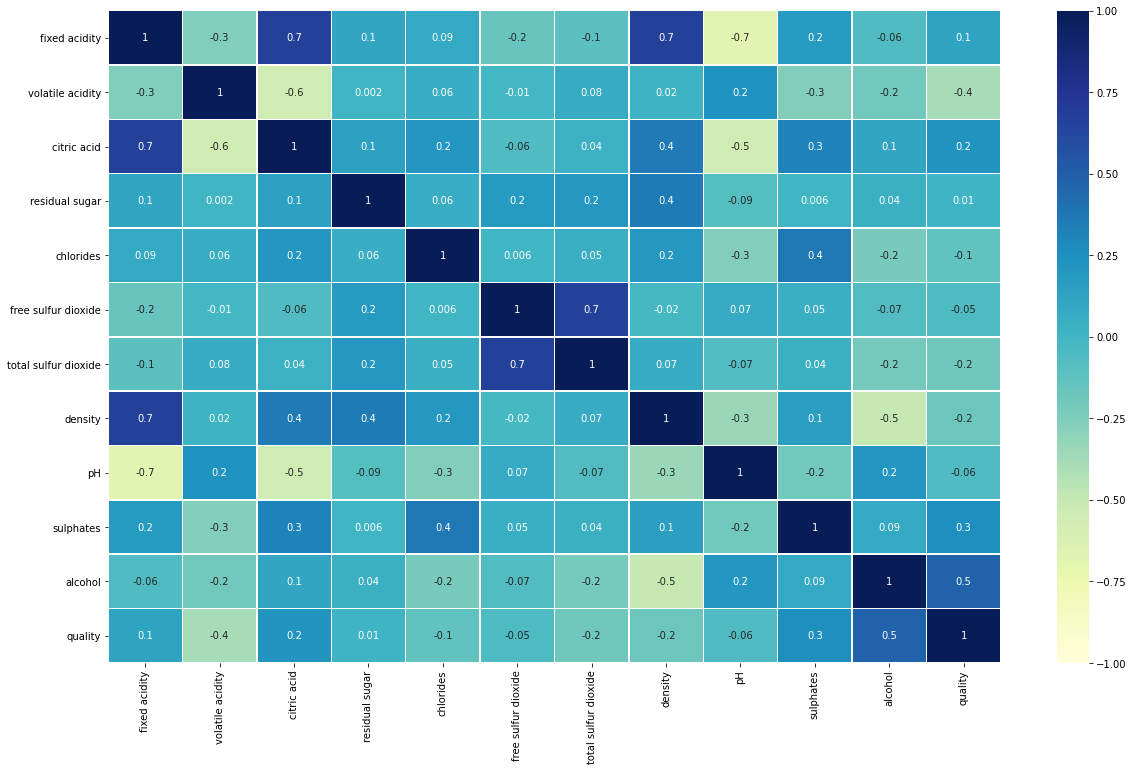

In [13]:
plt.figure(figsize=(20, 12))

# Selecionando apenas algumas colunas para verificar a correlação
corr = train.corr(method = 'pearson')

# Configurar o heatmap
sns.heatmap(corr, linewidths=.5, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", fmt='.1g')

# Imprimir o grafico
plt.show();

### Observações sobre a correlação dos dados
- Não é possível destacar uma alta correlação (>90%) evidente entre as variáveis deste dataset, apesar de algumas chegarem a +0.7

## Criação e Validação dos Modelos de Machine Learning

### Preparando os dados para treinamento do baseline

In [14]:
# Vamos armazenar 'qt_liberada' no rótulo (y) e o restante das colunas em X
y = train['quality']
X = train.drop(['quality'], axis = 1)

# Cria o padronizador
scaler = MinMaxScaler()

# Padronizando os dados
X = scaler.fit_transform(X)

# Split dos dados
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .3, random_state = 1)

# Verificando o shape apos o split entre feature e target
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(1119, 11) (1119,) (480, 11) (480,)


### Realizando o treinamento de todos os modelos

In [15]:
# Preparando a lista de modelos
modelos = []
modelos.append(('RandomForest',  RandomForestClassifier(max_depth=10, random_state=1)))
modelos.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
modelos.append(('DecisionTree', DecisionTreeClassifier()))
modelos.append(('SVM', SVC(gamma='auto',kernel='rbf')))
modelos.append(('MLP', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)))

# Avaliando cada modelo em um loop
for nome, modelo in modelos:
    
    # realizando o fit do modelo
    modelo.fit(X_train, y_train)
    
    # avaliando o score com dados de validação
    score = modelo.score(X_valid, y_valid)   

    # exibindo o resultado
    msg = "%s: %f" % (nome, score)
    print(msg)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

RandomForest: 0.679167


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN: 0.564583


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTree: 0.608333


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVM: 0.585417


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLP: 0.600000


### Observações sobre o desempenho dos modelos
    RandomForest  : 0.679167
    KNN           : 0.564583
    DecisionTree  : 0.608333
    SVM           : 0.585417
    MLP           : 0.600000

## Modelo Random Forest com feature target modificada

### Transformando a feature target em uma classificação binária

In [16]:
# Ajustando a variável alvo

# '0' vinhos ruins com notas menores que 5 (5,4,3)
# '1' vinhos bons com notas maiores que 5 (6,7,8)

train['quality'] = train['quality'].replace(3, 0)
train['quality'] = train['quality'].replace(4, 0)
train['quality'] = train['quality'].replace(5, 0)

train['quality'] = train['quality'].replace(6, 1)
train['quality'] = train['quality'].replace(7, 1)
train['quality'] = train['quality'].replace(8, 1)

In [17]:
train['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

### Preparando os dados para treinamento

In [18]:
# Vamos armazenar 'qt_liberada' no rótulo (y) e o restante das colunas em X
y = train['quality']
X = train.drop(['quality'], axis = 1)

# Cria o padronizador
scaler = MinMaxScaler()

# Padronizando os dados
X = scaler.fit_transform(X)

# Split dos dados
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .3, random_state = 1)

# Verificando o shape apos o split entre feature e target
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(1119, 11) (1119,) (480, 11) (480,)


### Treinamento do modelo

In [19]:
# Treinamento do modelo
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

# Verificando a acurácia
score = clf_floresta.score(X_valid, y_valid)   

print('Score RF: ',score)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Score RF:  0.8041666666666667
